## Cleaning data with pandas

## Pertemuan 6

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [3]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [5]:
# symbol -- tidak di anggap sebagai missing value untuk mengubahnya menjadi missing value kita harus mengubahnya menjadi NaN
df['NUM_BEDROOMS'].replace('--', np.nan) # fungsi np.nan untuk mengubah menjadi missing value

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7    NaN
8     na
Name: NUM_BEDROOMS, dtype: object

In [6]:
# bisa juga dengan cara ini
missing_values = ['n/a', 'na', '--']
df1 = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values = missing_values)

In [7]:
df1

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [8]:
df1['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [9]:
# di dalam koloom OWN_OCCUPIED terdapat unxpected value yaitu 12 
# untuk kasus seperti ini kita bisa mengubahnya menjadi missing value dengan cara loop pada kolom
cnt = 0
for row in df1['OWN_OCCUPIED']:
    try: # fungsinya untuk mengecek apakah ada error atau tidak
        int(row) # fungsi int untuk mengubah menjadi integer
        df1.loc[cnt, 'OWN_OCCUPIED'] = np.nan # fungsi np.nan untuk mengubah menjadi missing value
    except ValueError: # jika terjadi error maka akan di skip
        pass # fungsi pass untuk skip
    cnt += 1 # untuk menghitung jumlah baris

In [10]:
df1

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [11]:
df1.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [12]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [13]:
df1.isnull().sum().sum()

12

## Replacing

In [14]:
# mengisi kolom st_sum dengan nilai
df1['ST_NUM'].fillna(125, inplace=True)

In [15]:
# ingin melakukan imputasi berbasis lokasi 
df1.loc[2, 'ST_NUM'] = 125 # mengisi baris ke 2 kolom ST_NUM dengan nilai 125

In [16]:
median = df1['NUM_BEDROOMS'].median() # menghitung nilai median
df1['NUM_BEDROOMS'].fillna(median, inplace=True) # mengisi kolom NUM_BEDROOMS dengan nilai median

In [17]:
df1.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [18]:
df1['OWN_OCCUPIED'].fillna('Y', inplace=True)

In [19]:
df1['SQ_FT'].fillna(df1['SQ_FT'].mean(), inplace=True)

## analyzing Obesity

In [20]:
%matplotlib inline

In [25]:
data_xls = pd.ExcelFile('./Dataset/obes.xls') # membaca file excel

In [27]:
data_xls.sheet_names # menampilkan nama sheet

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [28]:
data_age = data_xls.parse(u'7.2', skiprows=4, skipfooter=14)


In [29]:
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [30]:
data_age.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

In [31]:
data_age.dropna(inplace=True)

In [32]:
data_age.set_index('Year', inplace=True)

In [33]:
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<Axes: xlabel='Year'>

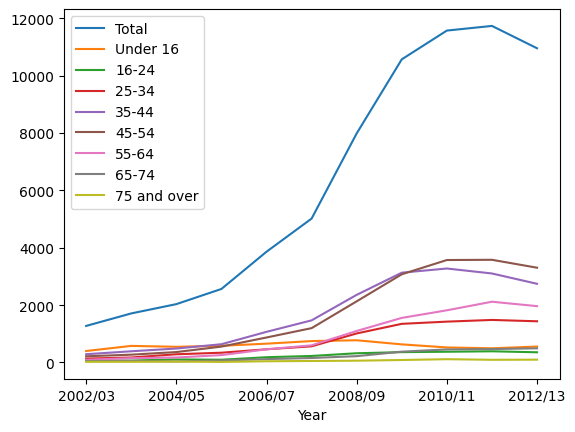

In [34]:
data_age.plot()

<Axes: xlabel='Year'>

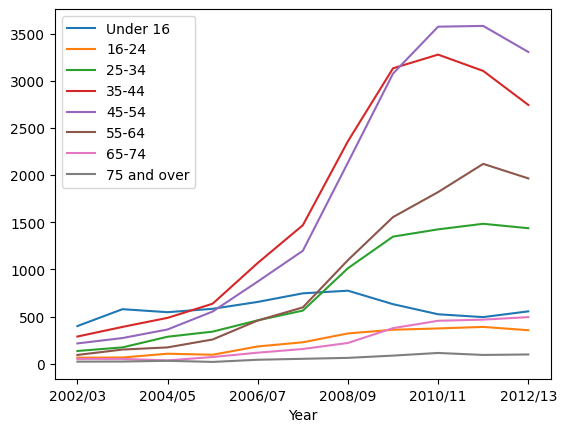

In [35]:
data_age.drop('Total', axis=1).plot()

<Axes: xlabel='Year'>

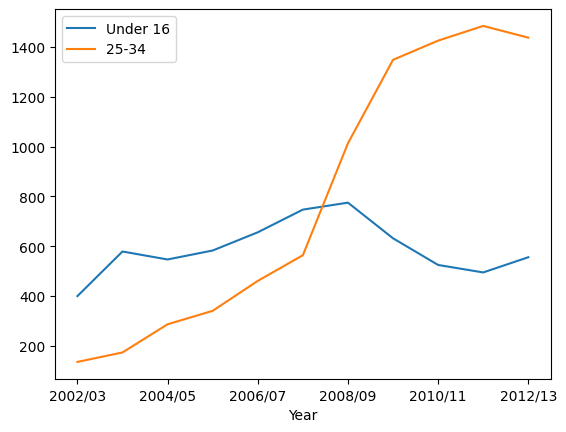

In [36]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['25-34'].plot(label="25-34", legend=True)

# Time Series

In [37]:
from datetime import datetime

In [38]:
date_range = pd.date_range(start='2022-01-01', end='2022-01-08', freq='H',)

In [39]:
date_range

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-01-07 15:00:00', '2022-01-07 16:00:00',
               '2022-01-07 17:00:00', '2022-01-07 18:00:00',
               '2022-01-07 19:00:00', '2022-01-07 20:00:00',
               '2022-01-07 21:00:00', '2022-01-07 22:00:00',
               '2022-01-07 23:00:00', '2022-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [70]:
data_ts = pd.DataFrame(date_range, columns=['datetime'])

In [41]:
data_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  169 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 KB


In [72]:
data_ts.set_index("datetime", inplace=True)

In [73]:
str_date_range = [str(x) for x in date_range]

In [74]:
pd.to_datetime(str_date_range,infer_datetime_format=True)

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-01-07 15:00:00', '2022-01-07 16:00:00',
               '2022-01-07 17:00:00', '2022-01-07 18:00:00',
               '2022-01-07 19:00:00', '2022-01-07 20:00:00',
               '2022-01-07 21:00:00', '2022-01-07 22:00:00',
               '2022-01-07 23:00:00', '2022-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [75]:
str_date = ['June-01-2022', 'June-02-2022', 'June-03-2022']
date_time_list = [datetime.strptime(d, '%B-%d-%Y') for d in str_date]

In [76]:
date_time_list

[datetime.datetime(2022, 6, 1, 0, 0),
 datetime.datetime(2022, 6, 2, 0, 0),
 datetime.datetime(2022, 6, 3, 0, 0)]

In [77]:
pd.DataFrame(date_time_list, columns=['date'])

,date
0,2022-06-01
1,2022-06-02
2,2022-06-03


In [78]:
data_ts[data_ts.index.day == 2]

""
datetime
2022-01-02 00:00:00
2022-01-02 01:00:00
2022-01-02 02:00:00
2022-01-02 03:00:00
2022-01-02 04:00:00
2022-01-02 05:00:00
2022-01-02 06:00:00
2022-01-02 07:00:00
2022-01-02 08:00:00


In [61]:
data_ts['2022-01-02']

C:\Users\hp\AppData\Local\Temp\ipykernel_16172\346746090.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data_ts['2022-01-02']


""
datetime
2022-01-02 00:00:00
2022-01-02 01:00:00
2022-01-02 02:00:00
2022-01-02 03:00:00
2022-01-02 04:00:00
2022-01-02 05:00:00
2022-01-02 06:00:00
2022-01-02 07:00:00
2022-01-02 08:00:00


In [59]:
data_ts.loc['2022-01-02':'2022-01-04']

""
datetime
2022-01-02 00:00:00
2022-01-02 01:00:00
2022-01-02 02:00:00
2022-01-02 03:00:00
2022-01-02 04:00:00
...
2022-01-04 19:00:00
2022-01-04 20:00:00
2022-01-04 21:00:00


In [67]:
data_ts.resample('D').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [68]:
df['rolling_sum'] = df.rolling(3).sum()

ValueError: Wrong number of items passed 2, placement implies 1

# Time Series on Dataset

In [85]:
data_energy = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv"
                          ,index_col=0
                          ,parse_dates=True)

In [86]:
data_energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [87]:
data_energy['year'] = data_energy.index.year
data_energy['month'] = data_energy.index.month
data_energy['weekday'] = data_energy.index.weekday

In [89]:
data_energy

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [90]:
data_energy.loc['2017-10-03']

Consumption    1176.7697
Wind            459.1350
Solar            79.5530
Wind+Solar      538.6880
year           2017.0000
month            10.0000
weekday           1.0000
Name: 2017-10-03 00:00:00, dtype: float64

In [91]:
data_energy.loc['2017-03-01':'2017-03-31']

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday
Date,,,,,,,
2017-03-01,1551.410,463.541,55.172,518.713,2017,3,2
2017-03-02,1541.733,640.792,79.159,719.951,2017,3,3
2017-03-03,1514.114,323.879,94.663,418.542,2017,3,4
2017-03-04,1265.589,253.254,99.949,353.203,2017,3,5
2017-03-05,1185.541,375.785,75.046,450.831,2017,3,6
2017-03-06,1519.850,244.779,52.157,296.936,2017,3,0
2017-03-07,1554.860,98.963,41.359,140.322,2017,3,1
2017-03-08,1565.245,362.636,53.960,416.596,2017,3,2
2017-03-09,1545.066,348.595,48.426,397.021,2017,3,3


<Axes: xlabel='Date'>

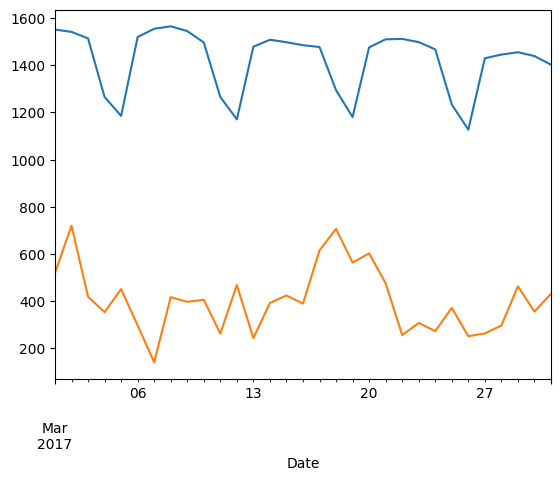

In [92]:
data_energy.loc['2017-03-01':'2017-03-31',"Consumption"].plot()
data_energy.loc['2017-03-01':'2017-03-31',"Wind+Solar"].plot()

In [93]:
data_energy.loc['2017-03']

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday
Date,,,,,,,
2017-03-01,1551.410,463.541,55.172,518.713,2017,3,2
2017-03-02,1541.733,640.792,79.159,719.951,2017,3,3
2017-03-03,1514.114,323.879,94.663,418.542,2017,3,4
2017-03-04,1265.589,253.254,99.949,353.203,2017,3,5
2017-03-05,1185.541,375.785,75.046,450.831,2017,3,6
2017-03-06,1519.850,244.779,52.157,296.936,2017,3,0
2017-03-07,1554.860,98.963,41.359,140.322,2017,3,1
2017-03-08,1565.245,362.636,53.960,416.596,2017,3,2
2017-03-09,1545.066,348.595,48.426,397.021,2017,3,3


<Axes: xlabel='Date'>

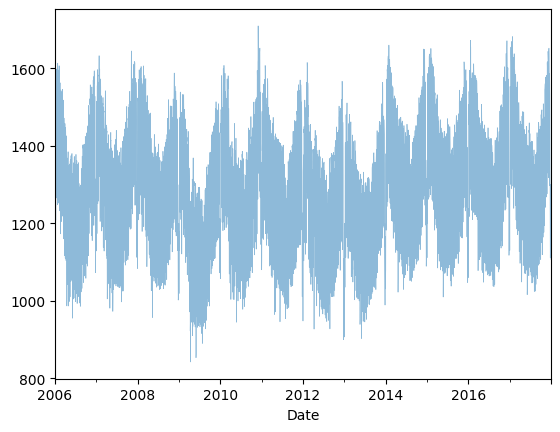

In [94]:
data_energy['Consumption'].plot(linewidth=.5,alpha=.5)

<Axes: xlabel='Date'>

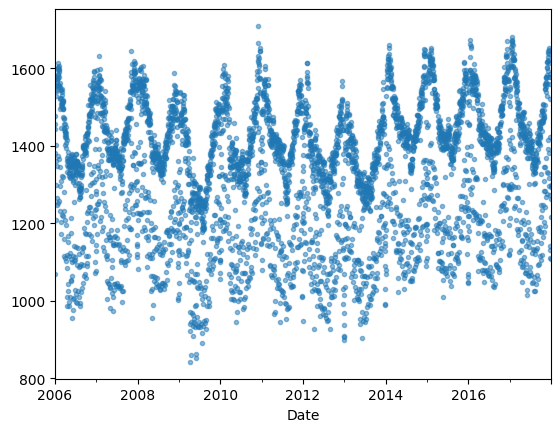

In [95]:
data_energy['Consumption'].plot(marker='.',alpha=.5,linestyle='None')

<Axes: xlabel='Date'>

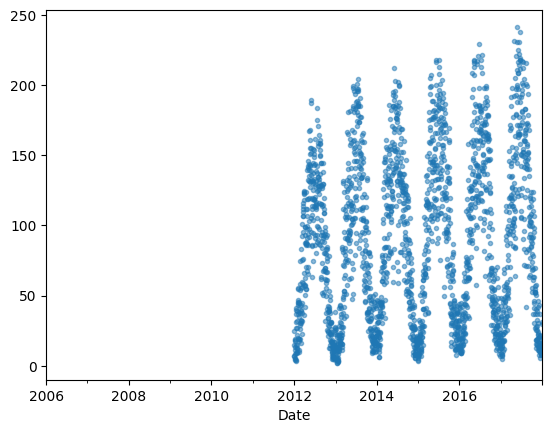

In [96]:
data_energy['Solar'].plot(marker='.',alpha=.5,linestyle='None')

<Axes: xlabel='Date'>

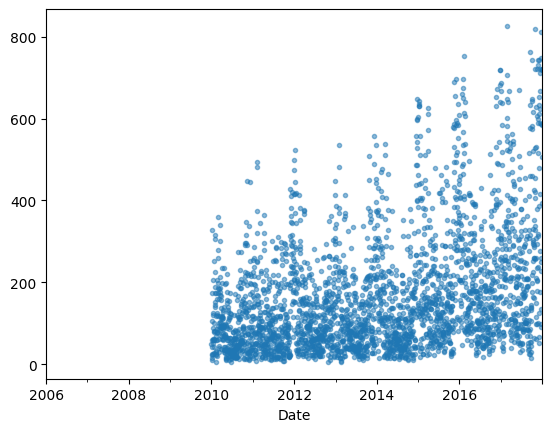

In [97]:
data_energy['Wind'].plot(marker='.',alpha=.5,linestyle='None')

Text(0, 0.5, 'Electricity consumption in GWh')

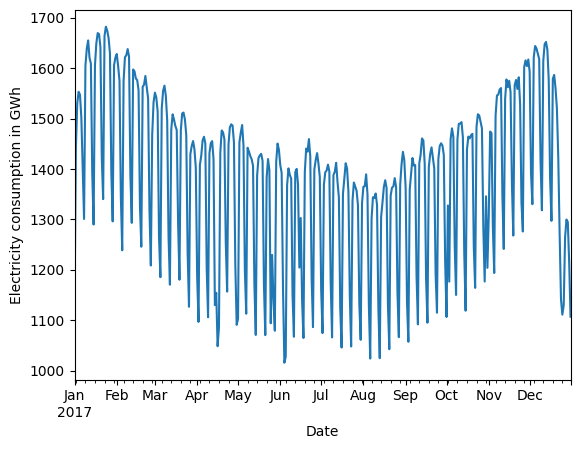

In [98]:
ax = data_energy.loc['2017', 'Consumption'].plot()
ax.set_ylabel("Electricity consumption in GWh")

Text(0, 0.5, 'Electricity consumption in GWh')

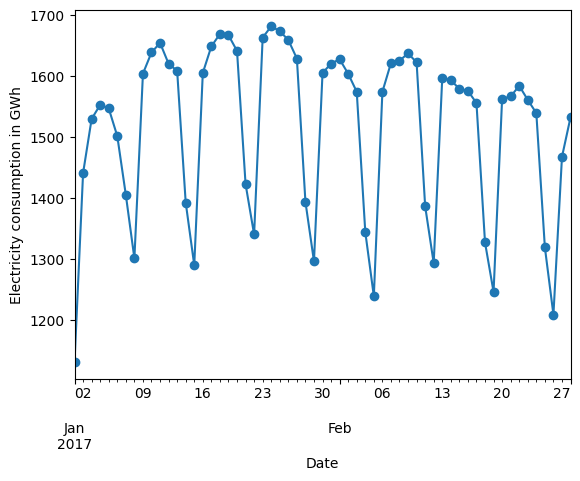

In [99]:
ax = data_energy.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o',linestyle='-')
ax.set_ylabel("Electricity consumption in GWh")

<Axes: title={'center': 'Consumption'}, xlabel='month'>

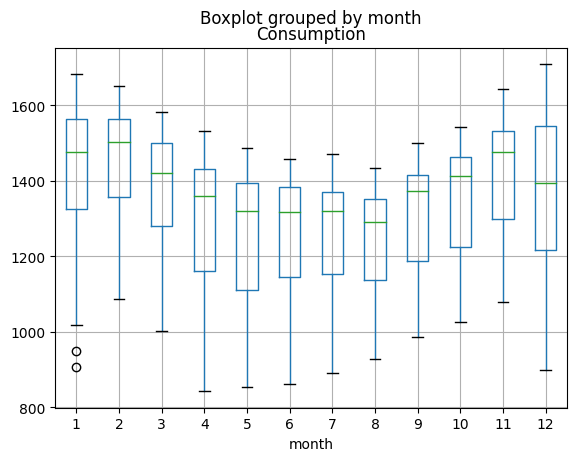

In [100]:
data_energy.boxplot(column=['Consumption'], by='month')

<Axes: title={'center': 'Solar'}, xlabel='month'>

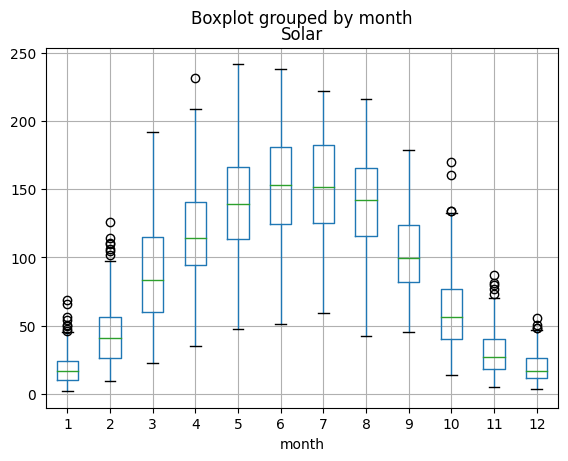

In [101]:
data_energy.boxplot(column=['Solar'], by='month')

<Axes: title={'center': 'Consumption'}, xlabel='month'>

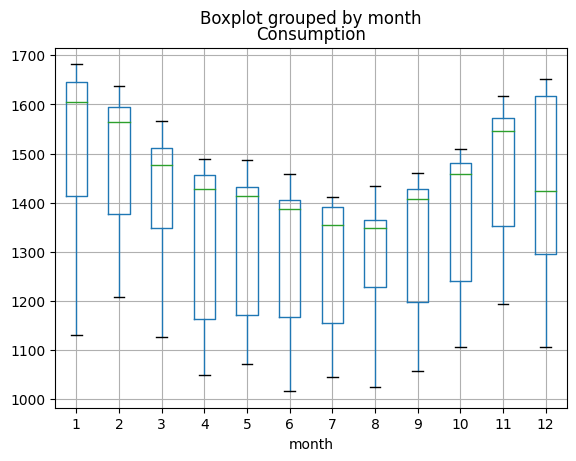

In [102]:
data_energy.loc['2017'].boxplot(column=['Consumption'], by='month')

<Axes: title={'center': 'Wind'}, xlabel='month'>

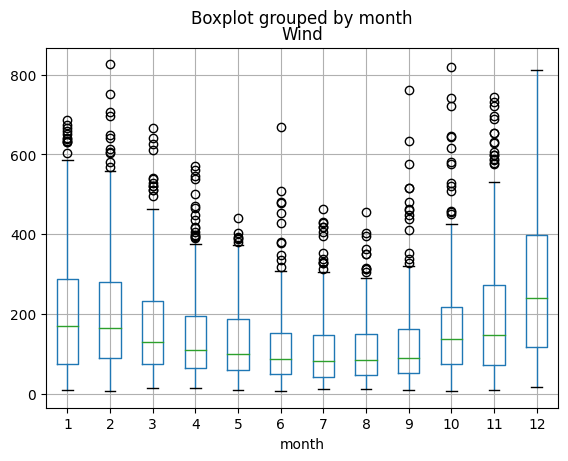

In [104]:
data_energy.boxplot(column=['Wind'], by='month')

In [106]:
columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
energy_weekly = data_energy[columns].resample('W').mean()

In [107]:
energy_weekly

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


<Axes: xlabel='Date'>

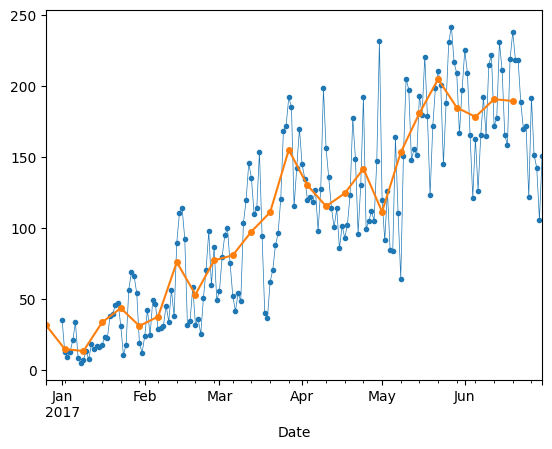

In [108]:
start, end = '2017-01' , '2017-6'

data_energy.loc[start:end, "Solar"].plot(marker='.', linestyle='-', linewidth=0.5)
energy_weekly.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', markersize=8)

In [109]:
data_energy['Consumption_MA7'] = data_energy['Consumption'].rolling(7).mean()

<Axes: xlabel='Date'>

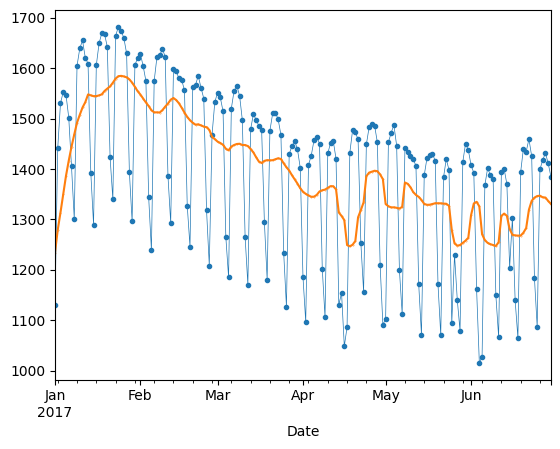

In [110]:
data_energy.loc[start:end, "Consumption"].plot(marker='.', linestyle='-', linewidth=0.5)
data_energy.loc[start:end, 'Consumption_MA7'].plot(marker='.', linestyle='-',markersize=0.5)